<a href="https://colab.research.google.com/github/yunaisme/python-ml-study/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math
import numpy as np
import plotly.express as px

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dataset/dd.csv")

dataframe column 확인

In [ ]:
data.columns

Index(['twt_tweets', 'twt_followers', 'twt_recent_tweet_count', 'valid_tweet',
       'github_total_star', 'website_is_ssl', 'holders_count', 'copy_max',
       'cnt_copy', 'verify_source', 'developer_holding_rate',
       'top_holders_rate', 'web_score'],
      dtype='object')

In [ ]:
data = data.astype('float64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   twt_tweets              1551 non-null   float64
 1   twt_followers           1551 non-null   float64
 2   twt_recent_tweet_count  1551 non-null   float64
 3   valid_tweet             1551 non-null   float64
 4   github_total_star       1551 non-null   float64
 5   website_is_ssl          1551 non-null   float64
 6   holders_count           1551 non-null   float64
 7   copy_max                1551 non-null   float64
 8   cnt_copy                1551 non-null   float64
 9   verify_source           1551 non-null   float64
 10  developer_holding_rate  1551 non-null   float64
 11  top_holders_rate        1551 non-null   float64
 12  web_score               1551 non-null   float64
dtypes: float64(13)
memory usage: 158.5 KB


In [ ]:
data.isnull().sum()

twt_tweets                8
twt_followers             8
twt_recent_tweet_count    8
valid_tweet               8
github_total_star         8
website_is_ssl            8
holders_count             8
copy_max                  8
cnt_copy                  8
verify_source             8
developer_holding_rate    8
top_holders_rate          8
web_score                 8
dtype: int64

In [ ]:
data = data.dropna(axis=0)

Sklearn을 이용한 PCA 분석과 차원 감소
https://bcho.tistory.com/1209?category=555440

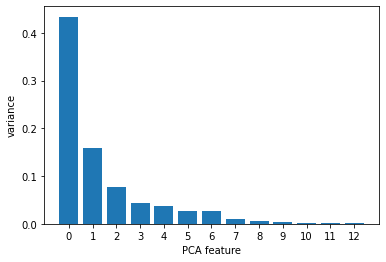

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = MinMaxScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(data)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

DBSCAN https://bcho.tistory.com/1205?category=555440

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

ss = MinMaxScaler()
data_s = pd.DataFrame(ss.fit_transform(data), columns = data.columns)

# create model and prediction
model = DBSCAN(eps=0.3, min_samples=5)
predict = pd.DataFrame(model.fit_predict(data_s))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([data_s,predict],axis=1)

In [ ]:
r.head()

,twt_tweets,twt_followers,twt_recent_tweet_count,valid_tweet,github_total_star,website_is_ssl,holders_count,copy_max,cnt_copy,verify_source,developer_holding_rate,top_holders_rate,web_score,predict
0,0.017745,0.036620,0.000,1.0,0.012174,1.0,0.021753,1.000000,1.0,1.0,0.000000e+00,0.866492,1.000000,0
1,0.049617,0.323944,0.125,1.0,0.412390,1.0,0.162970,0.034892,0.0,1.0,2.275566e-06,0.495024,1.000000,1
2,0.002851,0.000580,0.125,1.0,0.032979,1.0,0.006514,1.000000,1.0,1.0,8.288288e-07,0.138233,0.702970,0
3,0.029085,0.014085,0.100,1.0,0.115888,1.0,0.012400,1.000000,1.0,1.0,0.000000e+00,0.596863,1.000000,0
4,0.009723,0.002623,0.000,1.0,0.003082,1.0,0.000482,1.000000,1.0,1.0,0.000000e+00,0.030461,0.584158,0


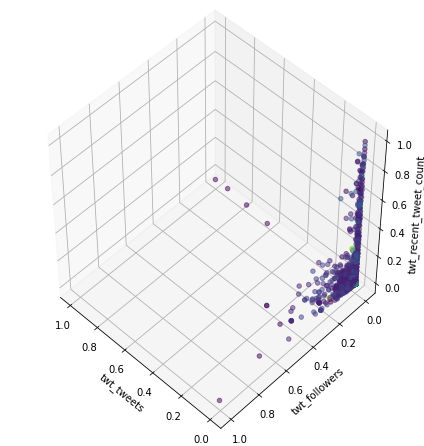

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['twt_tweets'],r['twt_followers'],r['twt_recent_tweet_count'],c=r['predict'],alpha=0.5)
ax.set_xlabel('twt_tweets')
ax.set_ylabel('twt_followers')
ax.set_zlabel('twt_recent_tweet_count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



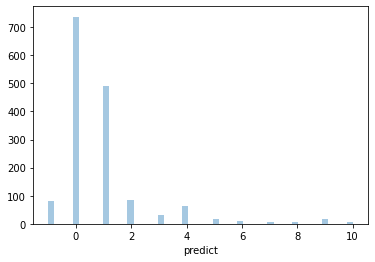

In [ ]:
sns.distplot(predict['predict'], kde=False)

In [ ]:
predict.to_csv('/content/drive/MyDrive/dataset/output_DBSCAN.csv')